In [408]:
import pickle as pk
import pandas as pd
import numpy as np
import os

LOC = 'london' # 'ny', 'paris', 'london'
PRE_COVID_MTHS = 2
COVID_MTHS = 5
PRE_VACCINE_MTHS = 5
POST_VACCINE_MTHS = 9

with open(f'./pck/{LOC}/pre_covid_{LOC}.pck', 'rb') as f:
    pre_covid = pk.load(f)
with open(f'./pck/{LOC}/covid_{LOC}.pck', 'rb') as f:
    covid = pk.load(f)
with open(f'./pck/{LOC}/pre_vaccine_{LOC}.pck', 'rb') as f:
    pre_vaccine = pk.load(f)
with open(f'./pck/{LOC}/post_vaccine_{LOC}.pck', 'rb') as f:
    post_vaccine = pk.load(f)
    
listings = pd.read_csv(f'./data/{LOC}/listings.csv')

In [409]:
pre_covid = pre_covid[['listing_id','date','comments','review_simple','sentiment']]
covid = covid[['listing_id','date','comments','review_simple','sentiment']]
pre_vaccine = pre_vaccine[['listing_id','date','comments','review_simple','sentiment']]
post_vaccine = post_vaccine[['listing_id','date','comments','review_simple','sentiment']]

In [410]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20210706215658,2021-07-08,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments my flat gives yo...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,4.85,4.53,4.52,NaN,f,3,3,0,0,1.63
1,13913,https://www.airbnb.com/rooms/13913,20210706215658,2021-07-08,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20210706215658,2021-07-08,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,t,1,1,0,0,0.81
3,17402,https://www.airbnb.com/rooms/17402,20210706215658,2021-07-08,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,15,15,0,0,0.36
4,17506,https://www.airbnb.com/rooms/17506,20210706215658,2021-07-08,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN


In [411]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [412]:
listings = listings[['id','host_since','host_response_rate','host_has_profile_pic','room_type','price','minimum_nights']]



In [413]:
listings.fillna(0,inplace=True)

In [414]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73364 entries, 0 to 73363
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    73364 non-null  int64 
 1   host_since            73364 non-null  object
 2   host_response_rate    73364 non-null  object
 3   host_has_profile_pic  73364 non-null  object
 4   room_type             73364 non-null  object
 5   price                 73364 non-null  object
 6   minimum_nights        73364 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.9+ MB


In [415]:
listings.head()

,id,host_since,host_response_rate,host_has_profile_pic,room_type,price,minimum_nights
0,11551,2009-10-03,100%,t,Entire home/apt,$99.00,2
1,13913,2009-11-16,100%,t,Private room,$65.00,1
2,15400,2009-12-05,0,t,Entire home/apt,$75.00,10
3,17402,2010-01-04,70%,t,Entire home/apt,$307.00,4
4,17506,2010-01-05,0,t,Private room,$150.00,3


In [416]:
listings.host_since = pd.to_datetime(listings.host_since)

In [417]:
listings.host_response_rate = listings.host_response_rate.astype(str)
listings.host_response_rate = listings.host_response_rate.apply(lambda x: str(x).replace("%",""))
listings.host_response_rate = listings.host_response_rate.astype(float)

In [418]:
listings.price = listings.price.astype(str)
listings.price = listings.price.apply(lambda x: x.replace("$", "").replace(",",""))
listings.price = listings.price.astype(float)

In [419]:
listings.host_has_profile_pic = listings.host_has_profile_pic.apply(lambda x: 1 if x == 't' else 0)

In [420]:
listings.head()

,id,host_since,host_response_rate,host_has_profile_pic,room_type,price,minimum_nights
0,11551,2009-10-03,100.0,1,Entire home/apt,99.0,2
1,13913,2009-11-16,100.0,1,Private room,65.0,1
2,15400,2009-12-05,0.0,1,Entire home/apt,75.0,10
3,17402,2010-01-04,70.0,1,Entire home/apt,307.0,4
4,17506,2010-01-05,0.0,1,Private room,150.0,3


In [421]:
pcm = pre_covid.merge(listings, how='left', left_on='listing_id', right_on='id', suffixes=['_review','_listing'])
cm = covid.merge(listings, how='left', left_on='listing_id', right_on='id', suffixes=['_review','_listing'])
pvm = pre_vaccine.merge(listings, how='left', left_on='listing_id', right_on='id', suffixes=['_review','_listing'])
vm = post_vaccine.merge(listings, how='left', left_on='listing_id', right_on='id', suffixes=['_review','_listing'])

In [422]:
pcm[pcm.sentiment < 0].describe().drop(labels=['listing_id','id'], axis=1)

,sentiment,host_response_rate,host_has_profile_pic,price,minimum_nights
count,928.000000,928.000000,928.000000,928.000000,928.000000
mean,-0.375313,63.271552,0.995690,93.637931,3.137931
std,0.251272,45.719604,0.065547,113.476410,9.366120
min,-0.975100,0.000000,0.000000,10.000000,1.000000
25%,-0.542300,0.000000,1.000000,37.000000,1.000000
50%,-0.341200,96.000000,1.000000,67.000000,2.000000
75%,-0.128000,100.000000,1.000000,112.250000,3.000000
max,-0.001500,100.000000,1.000000,1812.000000,180.000000


In [423]:
pcm[pcm.sentiment > 0].describe().drop(labels=['listing_id','id'], axis=1)

,sentiment,host_response_rate,host_has_profile_pic,price,minimum_nights
count,35884.000000,35884.000000,35884.000000,35884.000000,35884.000000
mean,0.814879,64.700451,0.996851,104.981970,3.285002
std,0.180625,45.721000,0.056029,411.485901,12.030278
min,0.003100,0.000000,0.000000,0.000000,1.000000
25%,0.743000,0.000000,1.000000,39.000000,1.000000
50%,0.885800,100.000000,1.000000,65.000000,2.000000
75%,0.946800,100.000000,1.000000,115.000000,3.000000
max,0.998400,100.000000,1.000000,17786.000000,1000.000000


In [424]:
cm[cm.sentiment < 0].describe().drop(labels=['listing_id','id'], axis=1)

,sentiment,host_response_rate,host_has_profile_pic,price,minimum_nights
count,458.000000,458.000000,458.000000,458.000000,458.000000
mean,-0.447994,69.235808,0.991266,104.037118,2.917031
std,0.275709,43.979171,0.093147,104.645451,9.853283
min,-0.981400,0.000000,0.000000,8.000000,1.000000
25%,-0.680450,0.000000,1.000000,41.000000,1.000000
50%,-0.402100,100.000000,1.000000,79.000000,1.000000
75%,-0.202300,100.000000,1.000000,130.000000,2.000000
max,-0.025800,100.000000,1.000000,1000.000000,180.000000


In [425]:
cm[cm.sentiment > 0].describe().drop(labels=['listing_id','id'], axis=1)

,sentiment,host_response_rate,host_has_profile_pic,price,minimum_nights
count,17192.000000,17192.000000,17192.000000,17192.000000,17192.000000
mean,0.818362,70.764658,0.996975,102.938809,3.608015
std,0.177694,43.274832,0.054915,297.202468,11.747240
min,0.025800,0.000000,0.000000,0.000000,1.000000
25%,0.750600,0.000000,1.000000,40.000000,1.000000
50%,0.886000,100.000000,1.000000,71.000000,2.000000
75%,0.948500,100.000000,1.000000,119.000000,3.000000
max,0.999000,100.000000,1.000000,16007.000000,365.000000


In [426]:
pvm[pvm.sentiment < 0].describe().drop(labels=['listing_id','id'], axis=1)

,sentiment,host_response_rate,host_has_profile_pic,price,minimum_nights
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,-0.473893,76.113150,0.995413,124.672783,2.987768
std,0.281726,38.740382,0.067625,263.243521,6.886734
min,-0.989200,0.000000,0.000000,11.000000,1.000000
25%,-0.709600,77.000000,1.000000,48.000000,1.000000
50%,-0.476700,99.000000,1.000000,83.000000,1.000000
75%,-0.224200,100.000000,1.000000,135.750000,3.000000
max,-0.000500,100.000000,1.000000,6000.000000,91.000000


In [427]:
pvm[pvm.sentiment > 0].describe().drop(labels=['listing_id','id'], axis=1)

,sentiment,host_response_rate,host_has_profile_pic,price,minimum_nights
count,29710.000000,29710.000000,29710.000000,29710.000000,29710.000000
mean,0.820816,80.522720,0.997745,110.099764,3.329249
std,0.174969,36.767227,0.047435,187.637934,11.439108
min,0.001500,0.000000,0.000000,0.000000,1.000000
25%,0.757900,90.000000,1.000000,45.000000,1.000000
50%,0.888150,100.000000,1.000000,84.000000,2.000000
75%,0.949475,100.000000,1.000000,130.000000,3.000000
max,0.998900,100.000000,1.000000,6000.000000,600.000000


In [428]:
vm[vm.sentiment < 0].describe().drop(labels=['listing_id','id'], axis=1)

,sentiment,host_response_rate,host_has_profile_pic,price,minimum_nights
count,917.000000,917.000000,917.000000,917.000000,917.000000
mean,-0.485865,85.126499,0.992366,118.225736,3.613959
std,0.287389,30.604951,0.087084,177.230102,23.637162
min,-0.989700,0.000000,0.000000,0.000000,1.000000
25%,-0.743000,90.000000,1.000000,54.000000,1.000000
50%,-0.476700,99.000000,1.000000,87.000000,1.000000
75%,-0.250000,100.000000,1.000000,135.000000,3.000000
max,-0.000600,100.000000,1.000000,3200.000000,600.000000


In [429]:
vm[vm.sentiment > 0].describe().drop(labels=['listing_id','id'], axis=1)

,sentiment,host_response_rate,host_has_profile_pic,price,minimum_nights
count,41861.000000,41861.000000,41861.000000,41861.000000,41861.000000
mean,0.819656,88.444973,0.997468,110.165739,2.981367
std,0.174559,28.220996,0.050258,137.928283,11.759210
min,0.001500,0.000000,0.000000,0.000000,1.000000
25%,0.757900,95.000000,1.000000,52.000000,1.000000
50%,0.886000,100.000000,1.000000,88.000000,2.000000
75%,0.947400,100.000000,1.000000,130.000000,3.000000
max,0.999300,100.000000,1.000000,6000.000000,365.000000


In [430]:
data = pd.read_csv('./data/owid-covid-data.csv')

In [431]:
data = data[data.location == 'United States']

In [432]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
110038,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
110039,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
110040,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
110041,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
110042,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75


In [433]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [434]:
data = data[['iso_code','location',
             'date','total_cases',
             'new_cases','new_cases_smoothed','total_deaths',
             'new_deaths','hosp_patients',
             'new_tests','total_tests',
             'positive_rate','total_vaccinations', 'new_vaccinations_smoothed',
             'people_vaccinated','new_vaccinations']]

In [435]:
pre_covid.groupby('date').agg({'sentiment':'mean'}).head()

,sentiment
date,
2020-01-02,0.637059
2020-01-03,0.630958
2020-01-04,0.621799
2020-01-05,0.658397
2020-01-06,0.664881


In [436]:
import datetime as dt

start_p1 = pd.to_datetime(dt.date(2020,1,1))
end_p1 = pd.to_datetime(dt.date(2020,2,29))
start_p2 = pd.to_datetime(dt.date(2020,3,1))
end_p2 = pd.to_datetime(dt.date(2020,7,31))
start_p3 = pd.to_datetime(dt.date(2020,8,1))
end_p3 = pd.to_datetime(dt.date(2020,12,31))
start_p4 = pd.to_datetime(dt.date(2021,1,1))
end_p4 = pd.to_datetime('today')

In [437]:
data.date = pd.to_datetime(data.date)
data = data.fillna(0)

In [438]:
pre_covid_data = data[(data.date > start_p1) & (data.date < end_p1)]
covid_data = data[(data.date > start_p2) & (data.date < end_p2)]
pre_vaccine_data = data[(data.date > start_p3) & (data.date < end_p3)]
post_vaccine_data = data[(data.date > start_p4) & (data.date < end_p4)]

In [439]:
pc = pre_covid.groupby('date').agg({'comments':'count','sentiment':'mean'})

In [440]:
pre_covid.columns

Index(['listing_id', 'date', 'comments', 'review_simple', 'sentiment'], dtype='object')

In [441]:
pc['rolling_com'] = pc.comments.rolling(window=7).mean()
pc['rolling_sen'] = pc.sentiment.rolling(window=7).mean()

In [442]:
pc = pc.fillna(0)

In [443]:
c = covid.groupby('date').agg({'comments':'count', 'sentiment':'mean'})
c['rolling_com'] = c.comments.rolling(window=7).mean()
c['rolling_sen'] = c.sentiment.rolling(window=7).mean()
c = c.fillna(0)

In [444]:
prv = pre_vaccine.groupby('date').agg({'comments':'count', 'sentiment':'mean'})
prv['rolling_com'] = prv.comments.rolling(window=7).mean()
prv['rolling_sen'] = prv.sentiment.rolling(window=7).mean()
prv = prv.fillna(0)

In [445]:
pov = post_vaccine.groupby('date').agg({'comments':'count', 'sentiment':'mean'})
pov['rolling_com'] = pov.comments.rolling(window=7).mean()
pov['rolling_sen'] = pov.sentiment.rolling(window=7).mean()
pov = pov.fillna(0)

In [446]:
pc.tail()

,comments,sentiment,rolling_com,rolling_sen
date,,,,
2020-02-24,738,0.673267,876.000000,0.687310
2020-02-25,476,0.673794,851.285714,0.687211
2020-02-26,535,0.674982,828.857143,0.687989
2020-02-27,615,0.653962,800.428571,0.683743
2020-02-28,776,0.656715,779.714286,0.680506


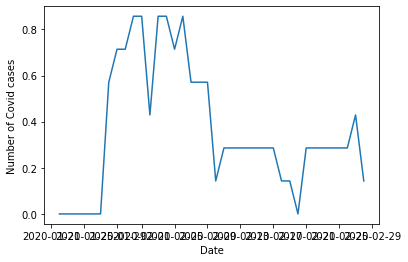

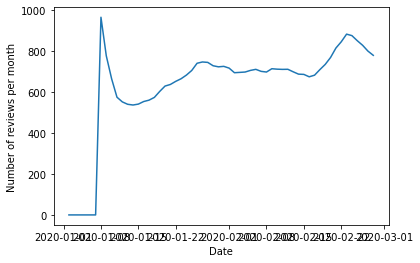

In [447]:
import matplotlib.pyplot as plt

# plt.subplot(1,2,1)
plt.plot(pre_covid_data.date, pre_covid_data.new_cases_smoothed)
plt.xlabel('Date')
plt.ylabel('Number of Covid cases')
plt.show()
# plt.subplot(1,2,2)
plt.plot(pc.index, pc.rolling_com)
plt.xlabel('Date')
plt.ylabel('Number of reviews per month')
# plt.ylim([0,1])
plt.show()

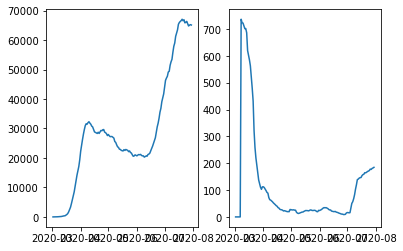

In [448]:
plt.subplot(1,2,1)
plt.plot(covid_data.date, covid_data.new_cases_smoothed)
plt.subplot(1,2,2)
plt.plot(c.index, c.rolling_com)

plt.show()

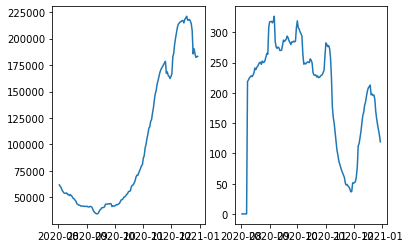

In [449]:
plt.subplot(1,2,1)
plt.plot(pre_vaccine_data.date, pre_vaccine_data.new_cases_smoothed)
plt.subplot(1,2,2)
plt.plot(prv.index, prv.rolling_com)

plt.show()

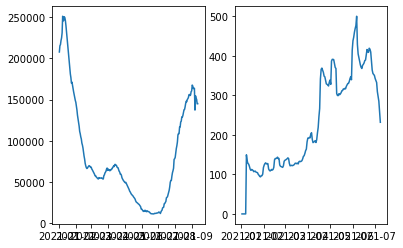

In [450]:
plt.subplot(1,2,1)
plt.plot(post_vaccine_data.date, post_vaccine_data.new_cases_smoothed)
plt.subplot(1,2,2)
plt.plot(pov.index, pov.rolling_com)

plt.show()

In [451]:
import datetime as dt
london = pd.read_csv("./data/london/reviews.csv")
london.date = pd.to_datetime(london.date)
london = london[london.date > dt.datetime(2020,1,1)]
ny = pd.read_csv("./data/ny/reviews.csv")
ny.date = pd.to_datetime(ny.date)
ny = ny[ny.date > dt.datetime(2020,1,1)]

In [452]:
l = london.groupby('date').agg({'comments':'count'})
l = ny.groupby('date').agg({'comments':'count'})

In [453]:
l.head()

,comments
date,
2020-01-02,1394
2020-01-03,938
2020-01-04,734
2020-01-05,807
2020-01-06,502


In [454]:
l['roll'] = l.comments.rolling(window=14).mean()

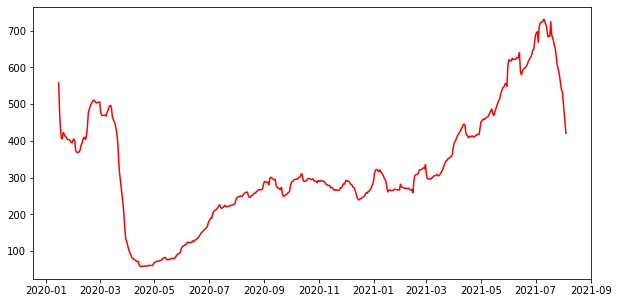

In [455]:
plt.figure(figsize=(10,5))
plt.plot(l.index, l.roll, 'r-')
plt.savefig("ny_airbnb.png")
plt.show()

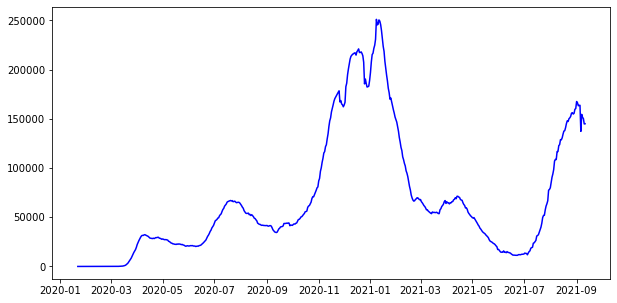

In [456]:
plt.figure(figsize=(10,5))
plt.plot(data.date, data.new_cases_smoothed, 'b-')
plt.savefig("ny_covid.png")
plt.show()

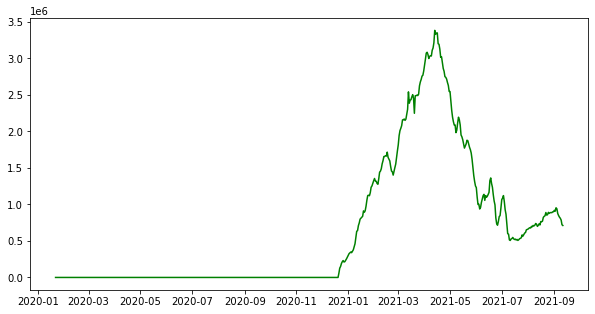

In [457]:
plt.figure(figsize=(10,5))
plt.plot(data.date, data.new_vaccinations_smoothed, 'g-')
plt.savefig("ny_vaccine.png")
plt.show()